In [1]:
# import libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten # Layers to be used for building our model
from tensorflow.keras.models import Model, Sequential # The class used to create a model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.random import set_seed
from tensorflow.keras.callbacks import EarlyStopping

**Load Data**

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


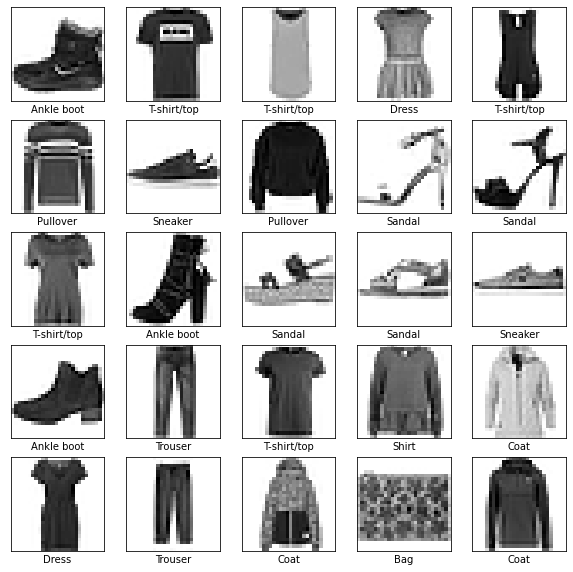

In [3]:
class_names = { 0: 'T-shirt/top',
                1: 'Trouser',
                2: 'Pullover',
                3: 'Dress',
                4: 'Coat',
                5: 'Sandal',
                6: 'Shirt',
                7: 'Sneaker',
                8: 'Bag',
                9: 'Ankle boot' }

plt.figure(figsize=(10,10))
for i in range(25):
   plt.subplot(5,5,i+1)
   plt.xticks([])
   plt.yticks([])
   plt.imshow(train_images[i], cmap=plt.cm.binary)
   plt.xlabel(class_names[train_labels[i]])
plt.show()

**Data Preparation**

In [4]:
# Train/validation/test split
train_x, val_x, train_y, val_y = train_test_split(train_images, train_labels, stratify=train_labels, random_state=48, test_size=0.2)
(test_x, test_y) = (test_images, test_labels)

In [5]:
# normalize to range 0-1
train_x = train_x / 255.0
val_x = val_x / 255.0
test_x = test_x / 255.0

In [6]:
#one-hot encode
train_y = to_categorical(train_y)
val_y = to_categorical(val_y)
test_y = to_categorical(test_y)

In [7]:
print(train_x.shape)  #(48000, 28, 28)
print(train_y.shape)  #(48000, 10)
print(val_x.shape)    #(12000, 28, 28)
print(val_y.shape)    #(12000, 10)
print(test_x.shape)   #(10000, 28, 28)
print(test_y.shape)   #(10000, 10)

(48000, 28, 28)
(48000, 10)
(12000, 28, 28)
(12000, 10)
(10000, 28, 28)
(10000, 10)


**Train MLP model**

In [8]:
model_mlp = Sequential()
model_mlp.add(Flatten(input_shape=(28, 28)))
model_mlp.add(Dense(512, activation='relu'))
model_mlp.add(Dense(10, activation='softmax'))

print(model_mlp.summary())

model_mlp.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
early_stop = EarlyStopping(monitor='val_loss', restore_best_weights=True, patience=5, verbose=1)
callback = [early_stop]

history_mlp = model_mlp.fit(train_x, train_y, 
                            epochs=50, 
                            batch_size=64, 
                            validation_data=(val_x, val_y), 
                            callbacks=callback)

Epoch 1/50
750/750 [==============================] - 5s 3ms/step - loss: 0.5071 - accuracy: 0.8195 - val_loss: 0.4055 - val_accuracy: 0.8582
Epoch 2/50
750/750 [==============================] - 3s 4ms/step - loss: 0.3779 - accuracy: 0.8635 - val_loss: 0.3478 - val_accuracy: 0.8722
Epoch 3/50
750/750 [==============================] - 3s 4ms/step - loss: 0.3358 - accuracy: 0.8775 - val_loss: 0.3278 - val_accuracy: 0.8853
Epoch 4/50
750/750 [==============================] - 2s 3ms/step - loss: 0.3095 - accuracy: 0.8861 - val_loss: 0.3353 - val_accuracy: 0.8778
Epoch 5/50
750/750 [==============================] - 2s 3ms/step - loss: 0.2881 - accuracy: 0.8936 - val_loss: 0.3140 - val_accuracy: 0.8867
Epoch 6/50
750/750 [==============================] - 2s 3ms/step - loss: 0.2749 - accuracy: 0.8990 - val_loss: 0.3098 - val_accuracy: 0.8888
Epoch 7/50
750/750 [==============================] - 2s 3ms/step - loss: 0.2624 - accuracy: 0.9029 - val_loss: 0.3097 - val_accuracy: 0.8873
Epoch 

In [10]:
# testing
score = model_mlp.evaluate(test_x, test_y, verbose=0)
print(f'Test loss: {score[0]:.4f}')
print(f'Test accuracy: {score[1]:.4f}')

Test loss: 0.3246
Test accuracy: 0.8863


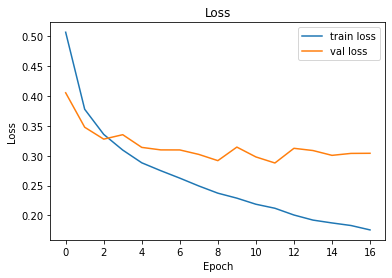

In [11]:
# loss
plt.figure(figsize=(6, 4))
plt.plot(history_mlp.history['loss'], label='train loss')
plt.plot(history_mlp.history['val_loss'], label='val loss')
plt.title(label = 'Loss', fontsize = 12, color = "black")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

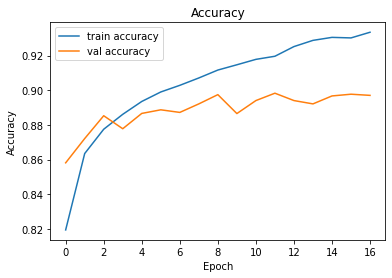

In [12]:
# accuracy
plt.figure(figsize=(6, 4))
plt.plot(history_mlp.history['accuracy'], label='train accuracy')
plt.plot(history_mlp.history['val_accuracy'], label='val accuracy')
plt.title(label = 'Accuracy', fontsize = 12, color = "black")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Train CNN model**

In [ ]:
model_cnn = Sequential()
model_cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Flatten())
model_cnn.add(Dense(100, activation='relu'))
model_cnn.add(Dense(10, activation='softmax'))

print(model_cnn.summary())

model_cnn.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 100)               540900    
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
________________________________________________

In [ ]:
history_cnn = model_cnn.fit(train_x, 
                           train_y, 
                           epochs=50, 
                           batch_size=32, 
                           validation_data=(val_x, val_y), 
                           callbacks=callback)

Epoch 1/50
1500/1500 [==============================] - 15s 4ms/step - loss: 0.4266 - accuracy: 0.8484 - val_loss: 0.3216 - val_accuracy: 0.8929
Epoch 2/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2884 - accuracy: 0.8966 - val_loss: 0.2764 - val_accuracy: 0.9038
Epoch 3/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2419 - accuracy: 0.9117 - val_loss: 0.2589 - val_accuracy: 0.9051
Epoch 4/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2095 - accuracy: 0.9236 - val_loss: 0.2813 - val_accuracy: 0.9008
Epoch 5/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1836 - accuracy: 0.9317 - val_loss: 0.2566 - val_accuracy: 0.9100
Epoch 6/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1601 - accuracy: 0.9414 - val_loss: 0.2367 - val_accuracy: 0.9183
Epoch 7/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1405 - accuracy: 0.9474 - val_loss: 0.2600 - val_accuracy

In [ ]:
# testing
score = model_cnn.evaluate(test_x, test_y, verbose=1)
print(f'Test loss: {score[0]:.4f}')
print(f'Test accuracy: {score[1]:.4f}')

313/313 [==============================] - 1s 3ms/step - loss: 0.2558 - accuracy: 0.9113
Test loss: 0.2558
Test accuracy: 0.9113


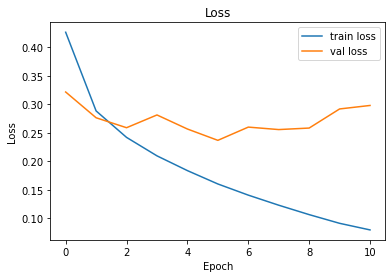

In [ ]:
# loss
plt.figure(figsize=(6, 4))
plt.plot(history_cnn.history['loss'], label='train loss')
plt.plot(history_cnn.history['val_loss'], label='val loss')
plt.title(label = 'Loss', fontsize = 12, color = "black")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

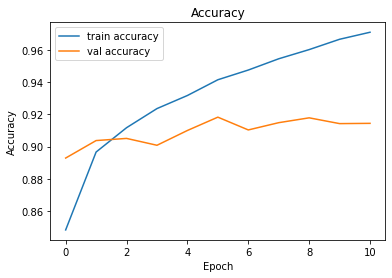

In [ ]:
# accuracy
plt.figure(figsize=(6, 4))
plt.plot(history_cnn.history['accuracy'], label='train accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='val accuracy')
plt.title(label = 'Accuracy', fontsize = 12, color = "black")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

References

https://towardsdatascience.com/create-image-classification-models-with-tensorflow-in-10-minutes-d0caef7ca011